[Paper](https://dl.acm.org/doi/pdf/10.5555/3370272.3370282)


[Code](https://github.com/sara-kassani/Classification-of-histopathological-biopsy-images-/blob/master/BreakHis-3path-CNN.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
from __future__ import print_function  
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import os
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torch.utils.data as data 
from torch.utils.data import Subset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.optim.lr_scheduler import ExponentialLR, StepLR, ReduceLROnPlateau
from sklearn import metrics
from torch.nn import functional as F
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.densenet import DenseNet201

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules


import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)




PyTorch Version:  1.10.0+cu111
Torchvision Version:  0.11.1+cu111


In [ ]:
import math
import keras
import keras.backend as K
import h5py
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, add, GlobalAveragePooling2D
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score
from keras.regularizers import l2
from keras.applications.xception import Xception, preprocess_input
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19


from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Lambda,Concatenate
from keras.layers import SeparableConv2D, AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Add

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale = 1./255)
    
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    seed=42
)
valid_generator = valid_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_val/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 480 images belonging to 8 classes.
Found 40 images belonging to 8 classes.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_test/",
    target_size=(224,224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",  #None
    shuffle=False,
    #seed=42
)


Found 1876 images belonging to 8 classes.


In [ ]:
nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(valid_generator.filenames)
predict_size_train = int(math.ceil(nb_train_samples / 32))
predict_size_valid = int(math.ceil(nb_validation_samples / 32))
nb_test_samples = len(test_generator.filenames)
predict_size_test = int(math.ceil(nb_test_samples / 32))


# nb_test_without_aug_samples = len(test_generator_without_aug.filenames)
# predict_size_test_without_aug = int(math.ceil(nb_test_without_aug_samples /32))

num_classes = len(train_generator.class_indices)

print("nb_train_samples:", nb_train_samples)
print("nb_validation_samples:", nb_validation_samples)
print("\npredict_size_train:", predict_size_train)
print("predict_size_validation:", predict_size_valid)
print("nb_test_samples:", nb_test_samples)
print("predict_size_test:", predict_size_test)

print("\n num_classes:", num_classes)

nb_train_samples: 480
nb_validation_samples: 40

predict_size_train: 15
predict_size_validation: 2
nb_test_samples: 1876
predict_size_test: 59

 num_classes: 8


In [ ]:
print("label map for train: ",train_generator.class_indices)
print("")
print("----")
print("")
print("label map for val data: ",valid_generator.class_indices)

label map for train:  {'benign_adenosis': 0, 'benign_fibroadenoma': 1, 'benign_phyllodestumor': 2, 'benign_tubularadenoma': 3, 'malignant_ductalcarcinoma': 4, 'malignant_lobularcarcinoma': 5, 'malignant_mucinouscarcinoma': 6, 'malignant_papillarycarcinoma': 7}

----

label map for val data:  {'benign_adenosis': 0, 'benign_fibroadenoma': 1, 'benign_phyllodestumor': 2, 'benign_tubularadenoma': 3, 'malignant_ductalcarcinoma': 4, 'malignant_lobularcarcinoma': 5, 'malignant_mucinouscarcinoma': 6, 'malignant_papillarycarcinoma': 7}


In [ ]:
print("Train classes: ",train_generator.classes)
print("")
print("Valid classes: ",valid_generator.classes)

Train classes:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]

Valid cla

In [ ]:
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)

#<font size=6>i) VGG-19

In [ ]:
model_name1 = "breakhis_vgg19"

In [ ]:
input_tensor = Input(shape = input_shape)  
base_model1 = VGG19(weights='imagenet', include_top=False, pooling = 'avg', input_tensor=input_tensor)

In [ ]:
c1 = base_model1.layers[4].output 
c1 = GlobalAveragePooling2D()(c1)       

c2 = base_model1.layers[7].output
c2 = GlobalAveragePooling2D()(c2)       

c3 = base_model1.layers[12].output
c3 = GlobalAveragePooling2D()(c3)       

c4 = base_model1.layers[17].output
c4 = GlobalAveragePooling2D()(c4)

con = concatenate([c1, c2, c4])

bottleneck_final_model1 = Model(inputs=base_model1.input, outputs=con)

In [ ]:
bottleneck_final_model1.summary()

In [ ]:
bottleneck_features_train1 = bottleneck_final_model1.predict_generator(train_generator, predict_size_train)
np.save(extracted_features_dir+'bottleneck_features_train_'+model_name1+'.npy', bottleneck_features_train)

In [ ]:
bottleneck_features_validation1 = bottleneck_final_model1.predict_generator(valid_generator, predict_size_validation)
np.save(extracted_features_dir+'bottleneck_features_validation_'+model_name1+'.npy', bottleneck_features_validation1)

bottleneck_features_test1 = bottleneck_final_model1.predict_generator(test_generator, predict_size_test)
np.save(extracted_features_dir+'bottleneck_features_test_'+model_name1+'.npy', bottleneck_features_test1)

In [ ]:
train_data = np.load(extracted_features_dir+'bottleneck_features_train_'+model_name1+'.npy')
validation_data = np.load(extracted_features_dir+'bottleneck_features_validation_'+model_name1+'.npy')
test_data = np.load(extracted_features_dir+'bottleneck_features_test_'+model_name1+'.npy')

train_labels = train_generator.classes
train_labels = to_categorical(train_labels, num_classes=num_classes)

validation_labels = valid_generator.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [ ]:
dropout_rate = 0.4

model1 = Sequential()
# model.add(Flatten(input_shape=train_data.shape[1:]))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(dropout_rate))
model1.add(Dense(num_classes, activation=tf.nn.softmax))

adam_opt2=Adam(lr = 0.0001, beta_1=0.6, beta_2=0.9, amsgrad=False)

model1.compile(optimizer=adam_opt2, loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(train_data, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels),
                    verbose= 2)

with open(extracted_features_dir+'history_'+model_name1+'.txt','w') as f:
    f.write(str(history.history))


In [ ]:
model1.save('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/vgg19.h5')

In [ ]:
from keras.models import load_model
model1 = load_model('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/vgg19.h5')

In [ ]:
preds = model1.predict(test_data)

predictions = [i.argmax() for i in preds]

Evaluation

#<font size=6>ii) MobileNet V2

In [ ]:
model_name2 = "breakhis_mobilenet"

In [ ]:
input_tensor = Input(shape = input_shape)  
base_model2 = MobileNetV2(weights='imagenet', include_top=False, pooling = 'avg', input_tensor=input_tensor)
bottleneck_final_model2 = base_model2

In [ ]:
bottleneck_final_model2.summary()

In [ ]:
bottleneck_features_train2 = bottleneck_final_model2.predict_generator(train_generator, predict_size_train)
np.save(extracted_features_dir+'bottleneck_features_train_'+model_name2+'.npy', bottleneck_features_train2)

In [ ]:
bottleneck_features_validation2 = bottleneck_final_model2.predict_generator(valid_generator, predict_size_validation)
np.save(extracted_features_dir+'bottleneck_features_validation_'+model_name2+'.npy', bottleneck_features_validation2)

bottleneck_features_test2 = bottleneck_final_model2.predict_generator(test_generator, predict_size_test)
np.save(extracted_features_dir+'bottleneck_features_test_'+model_name2+'.npy', bottleneck_features_test2)

In [ ]:
train_data = np.load(extracted_features_dir+'bottleneck_features_train_'+model_name2+'.npy')
validation_data = np.load(extracted_features_dir+'bottleneck_features_validation_'+model_name2+'.npy')
test_data = np.load(extracted_features_dir+'bottleneck_features_test_'+model_name2+'.npy')

train_labels = train_generator.classes
train_labels = to_categorical(train_labels, num_classes=num_classes)

validation_labels = valid_generator.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [ ]:
dropout_rate = 0.4

model2 = Sequential()
# model.add(Flatten(input_shape=train_data.shape[1:]))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(dropout_rate))
model2.add(Dense(num_classes, activation=tf.nn.softmax))

adam_opt2=Adam(lr = 0.0001, beta_1=0.6, beta_2=0.9, amsgrad=False)

model2.compile(optimizer=adam_opt2, loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(train_data, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels),
                    verbose= 2)

with open(extracted_features_dir+'history_'+model_name2+'.txt','w') as f:
    f.write(str(history.history))


In [ ]:
model2.save("/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/mobnetv2.h5" )
from keras.models import load_model
model2 = load_model('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/mobnetv2.h5')

In [ ]:
preds = model2.predict(test_data)

predictions = [i.argmax() for i in preds]

Evaluation

#<font size=6>iii) DenseNet201

#Three-path CNN (VGG19-MobileNetV2-DenseNet201)

In [ ]:
extracted_features_dir = "/content/drive/My Drive/FEW_SHOT_MUTLI_TASK/Comparison/extracted_features/"
model_name = "threepath_cnn"

In [ ]:
input_tensor = Input(shape = input_shape)  

base_model1=VGG19(input_shape= input_shape,weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model2=MobileNetV2(input_shape= input_shape,weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model3=DenseNet201(input_shape= input_shape,weights='imagenet', include_top=False, input_tensor=input_tensor)

x1 = base_model1.output
x1 = GlobalAveragePooling2D()(x1)

x2 = base_model2.output
x2 = GlobalAveragePooling2D()(x2)

x3 = base_model3.output
x3 = GlobalAveragePooling2D()(x3)

merge = concatenate([x1, x2, x3])
predictions = Dense(num_classes, activation='softmax')(merge)

model = Model(inputs=input_tensor,outputs=predictions)

74850304/74836368 [==============================] - 2s 0us/step


In [ ]:
c1 = model.layers[7].output 
c1 = GlobalAveragePooling2D()(c1)       

c2 = model.layers[53].output
c2 = GlobalAveragePooling2D()(c2)       

c3 = model.layers[141].output
c3 = GlobalAveragePooling2D()(c3)       

c4 = model.layers[481].output
c4 = GlobalAveragePooling2D()(c4) 

c5 = model.layers[827].output
c5 = GlobalAveragePooling2D()(c5) 

c6 = model.layers[835].output
c6 = GlobalAveragePooling2D()(c6) 

c7 = model.layers[851].output
c7 = GlobalAveragePooling2D()(c7) 

c8 = model.layers[866].output
c8 = GlobalAveragePooling2D()(c8) 

con = concatenate([c1, c2, c3, c4, c5, c6, c7, c8])

bottleneck_final_model = Model(inputs=model.input, outputs=con)

In [ ]:
bottleneck_final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
bottleneck_features_train = bottleneck_final_model.predict_generator(train_generator, predict_size_train)
bottleneck_features_validation = bottleneck_final_model.predict_generator(valid_generator, predict_size_valid)
bottleneck_features_test = bottleneck_final_model.predict_generator(test_generator, predict_size_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
np.save("/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/EF/BF_train/threepath_cnn.npy",  bottleneck_features_train)
np.save('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/EF/BF_valid/threepath_cnn.npy', bottleneck_features_validation)
np.save('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/EF/BF_test/threepath_cnn.npy', bottleneck_features_test)

In [ ]:
train_data = np.load('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/EF/BF_train/threepath_cnn.npy')
validation_data = np.load('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/EF/BF_valid/threepath_cnn.npy')
test_data = np.load('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/EF/BF_test/threepath_cnn.npy')

In [ ]:

train_labels = train_generator.classes
train_labels = to_categorical(train_labels, num_classes=num_classes)

validation_labels = valid_generator.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [ ]:
dropout_rate = 0.5

model = Sequential()
# model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation=tf.nn.softmax))

adam_opt2=Adam(lr = 0.0001, beta_1=0.7, beta_2=0.995, amsgrad=True)

model.compile(optimizer=adam_opt2, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=1000,
                    batch_size=32,
                    validation_data=(validation_data, validation_labels),
                    verbose= 2)

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 - 2s - loss: 7.3320 - accuracy: 0.1250 - val_loss: 2.8669 - val_accuracy: 0.1500 - 2s/epoch - 106ms/step
Epoch 2/1000
15/15 - 0s - loss: 4.1321 - accuracy: 0.1375 - val_loss: 2.3063 - val_accuracy: 0.0500 - 59ms/epoch - 4ms/step
Epoch 3/1000
15/15 - 0s - loss: 2.5239 - accuracy: 0.1729 - val_loss: 2.0520 - val_accuracy: 0.1750 - 58ms/epoch - 4ms/step
Epoch 4/1000
15/15 - 0s - loss: 2.0792 - accuracy: 0.2083 - val_loss: 2.0568 - val_accuracy: 0.1750 - 63ms/epoch - 4ms/step
Epoch 5/1000
15/15 - 0s - loss: 1.9427 - accuracy: 0.2812 - val_loss: 2.0636 - val_accuracy: 0.1750 - 59ms/epoch - 4ms/step
Epoch 6/1000
15/15 - 0s - loss: 1.9261 - accuracy: 0.2375 - val_loss: 1.9935 - val_accuracy: 0.2000 - 55ms/epoch - 4ms/step
Epoch 7/1000
15/15 - 0s - loss: 1.8975 - accuracy: 0.2646 - val_loss: 2.0062 - val_accuracy: 0.2000 - 59ms/epoch - 4ms/step
Epoch 8/1000
15/15 - 0s - loss: 1.8647 - accuracy: 0.2854 - val_loss: 2.0026 - val_accuracy: 0.1750 - 67ms/epoch - 4ms/step
Epoch 9/1000
15/15 - 

FileNotFoundError: ignored

In [ ]:

#with open(extracted_features_dir+'history_'+model_name+'.txt','w') as f:
#    f.write(str(history.history))

In [ ]:
model.save("/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/Ensemble_vgg19_mobilenetv2_densenet201.h5" )

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/Ensemble_vgg19_mobilenetv2_densenet201.h5')

#Testing

In [ ]:
pred = model.predict(test_data)

y_prd = [i.argmax() for i in pred]

In [ ]:
test_generator.reset()

In [ ]:
y_true = test_generator.classes

In [ ]:
print("Test images class lables: ",y_true)

Test images class lables:  [0 0 0 ... 7 7 7]


In [ ]:
pred=model.predict_generator(generator=test_generator, steps=test_generator.samples, max_queue_size=10,               
                                workers=1, use_multiprocessing=False, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


InvalidArgumentError: ignored

In [ ]:
#y_pred = np.argmax(pred,axis=1)
print("Test images predicted labels: ", pred)

Test images predicted labels:  [[5.83371520e-01 7.17701316e-02 1.57020211e-01 ... 9.64761712e-03
  3.26945409e-02 1.44220202e-03]
 [8.07393670e-01 1.04509364e-03 6.14854842e-02 ... 7.79914146e-04
  8.94022465e-04 1.21745961e-02]
 [9.21162516e-02 8.19955487e-03 3.14126581e-01 ... 2.24755774e-03
  2.45829741e-03 1.52920827e-01]
 ...
 [1.07746199e-02 6.39778450e-02 1.77950203e-01 ... 3.59819978e-02
  1.26367450e-01 2.85230279e-01]
 [6.65493499e-05 3.12351855e-03 4.36929427e-03 ... 2.15055756e-04
  2.30148528e-02 9.09321785e-01]
 [1.14808779e-03 6.30709529e-02 1.74665123e-01 ... 9.58158448e-02
  1.10604666e-01 3.04881126e-01]]


In [ ]:
pred.shape

(1876, 8)

In [ ]:
y_prd = np.argmax(pred,axis=1)
print("y_prd shape: ",y_prd.shape)
print("")
print("y_true.shape", y_true.shape)

y_prd shape:  (1876,)

y_true.shape (1876,)


#Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_prd)
print('Confusion Matrix\n')
print(cm)

Confusion Matrix

[[ 57   3   7  11  13   5   2   0]
 [  5  64  35  91  15   8   6  14]
 [  9  22  48   7   5   0   1   2]
 [ 17   8   5  79  15   0   1   7]
 [ 12  27  31  11 440  56  96 184]
 [  0   5   6   0  43  70   9   7]
 [ 14   4  10  24  60  10  47  19]
 [  1   9   6  14  23   0   7  69]]


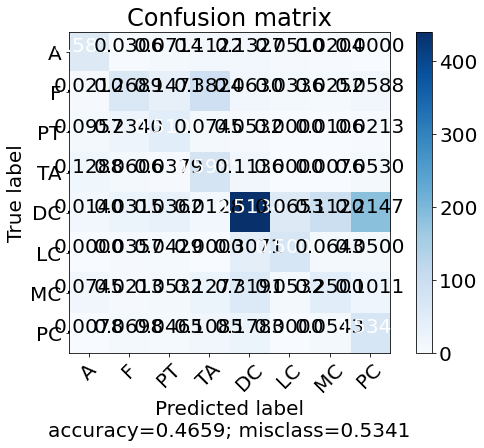

In [ ]:
import numpy as np
import itertools

target_names = ['A', 'F', 'PT', 'TA', 'DC','LC', 'MC', 'PC']

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):



    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm, target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=True)

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_prd)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_prd, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_prd, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_prd, average='weighted')))


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_prd, target_names=['Class 0- A:', 'Class 1- F:', 'Class 2- PT:', 'Class 3- TA:','Class 4- DC:','Class 5- LC:','Class 6- MC:', 'Class 7- PC:'], digits = 4))



Accuracy: 0.47

Micro Precision: 0.47
Micro Recall: 0.47
Micro F1-score: 0.47

Macro Precision: 0.41
Macro Recall: 0.47
Macro F1-score: 0.42

Weighted Precision: 0.53
Weighted Recall: 0.47
Weighted F1-score: 0.48

Classification Report

              precision    recall  f1-score   support

 Class 0- A:     0.4957    0.5816    0.5352        98
 Class 1- F:     0.4507    0.2689    0.3368       238
Class 2- PT:     0.3243    0.5106    0.3967        94
Class 3- TA:     0.3333    0.5985    0.4282       132
Class 4- DC:     0.7166    0.5134    0.5982       857
Class 5- LC:     0.4698    0.5000    0.4844       140
Class 6- MC:     0.2781    0.2500    0.2633       188
Class 7- PC:     0.2285    0.5349    0.3202       129

    accuracy                         0.4659      1876
   macro avg     0.4121    0.4697    0.4204      1876
weighted avg     0.5288    0.4659    0.4785      1876



<font size = 5><font color="yellow">ROC AUC score/curve

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
#roc auc score
scr1 = roc_auc_score(y_true, pred, multi_class='ovo', average='macro')
scr3 = roc_auc_score(y_true, pred, multi_class='ovr', average='macro')
scr2 = roc_auc_score(y_true, pred, multi_class='ovo', average='weighted')
scr4 = roc_auc_score(y_true, pred, multi_class='ovr', average='weighted')

print("macro - ovo ROC AUC Score: ", scr1)
print("")

print("weighted - ovo ROC AUC Score: ", scr2)
print("")

print("macro - ovr ROC AUC Score: ", scr3)
print("")

print("weighted - ovr ROC AUC Score: ", scr4)
print("")


macro - ovo ROC AUC Score:  0.8314628086348291

weighted - ovo ROC AUC Score:  0.813078557247822

macro - ovr ROC AUC Score:  0.819001800748304

weighted - ovr ROC AUC Score:  0.7941096111174868



class 0 - A  : --AUC---> 0.17
class 1 - F  : --AUC---> 0.26
class 2 - PT  : --AUC---> 0.18
class 3 - TA  : --AUC---> 0.28
class 4 - DC  : --AUC---> 0.7
class 5 - LC  : --AUC---> 0.63
class 6 - MC  : --AUC---> 0.54
class 7 - PC  : --AUC---> 0.68


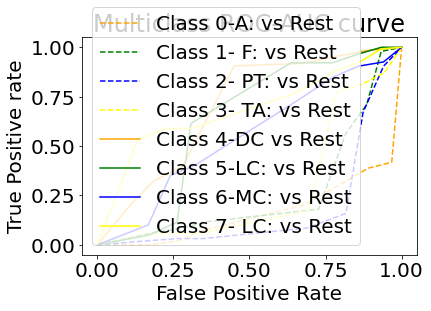

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

target_names = ['A', 'F', 'PT', 'TA', 'DC','LC', 'MC', 'PC']
n_class = 8

for i in range(len(target_names)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_prd[:], pos_label=i)
    auroc = round(metrics.auc(fpr[i], tpr[i]),2)
    print('class',i,'-', target_names[i],' :','--AUC--->',auroc)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0-A: vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1- F: vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2- PT: vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3- TA: vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='-',color='orange', label='Class 4-DC vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-',color='green', label='Class 5-LC: vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='-',color='blue', label='Class 6-MC: vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='-',color='yellow', label='Class 7- LC: vs Rest')


plt.title('Multiclass ROC-AUC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multilass ROC',dpi=300, bbox_inches='tight',   pad_inches = 0);


plt.show()